In [1]:
%load_ext autoreload

# ODE

## Ejercicio 1
$y'= -5y+5t^2+2t$
* $0 \le t \le 1$
* $y(t_0)=1/3$
* $N=10$



In [11]:
%autoreload 2
from src import ODE_euler
import math
import matplotlib.pyplot as plt
import numpy as np


In [9]:
def f_approx(t: float, y: float) -> float:
    return -5*y + 5*t**2 + 2*t 

ys,ts,h = ODE_euler(a=0, b=1, y_t0=1/3, f=f_approx, N=10)

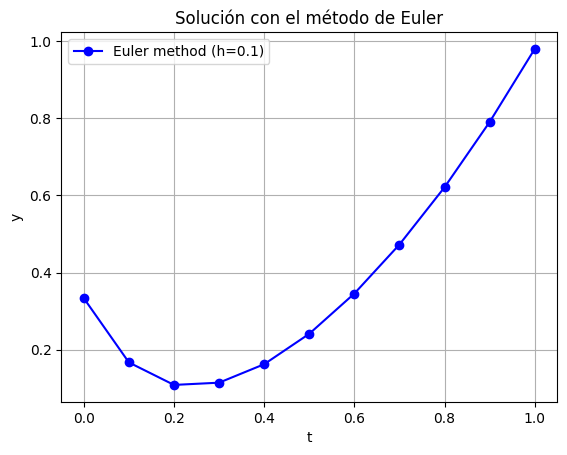

In [17]:
# Plot the solution
plt.plot(ts, ys, marker='o', label=f'Euler method (h={h})', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solución con el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

## Comparación con la solución real
La solución real de la ecuación diferencial es:
$y(t)=t^2 +1/3e^{-5t}$

* Grafique la solución real y la aproximación obtenida con el método de Euler en una misma gráfica.



In [13]:

# Funcion Real
def f_real(t: float) -> float:
    return t**2 + 1 / 3 * np.exp(-5 * t)

# Parámetros del problema
#t = np.linspace(0, 2, 100)
#y_t0_real = t**2 + 1 / 3 * np*exp(-5 * t)

#ys_real, ts_real, h_real = ODE_euler(a=0, b=2, f=f_real, y_t0=1/3, N=10)
ts_real = np.linspace(0, 1, 10)
ys_real = f_real(ts_real)


# Funcion Aproximada
def f_approx(t: float, y: float) -> float:
    return -5*y + 5*t**2 + 2*t 

ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=0, b=1, f=f_approx, y_t0=1/3, N=10)


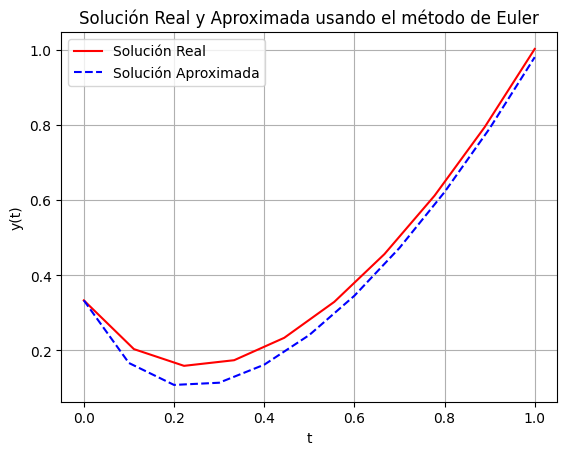

In [15]:
# Plotting both solutions
plt.plot(ts_real, ys_real, label='Solución Real', color='red')
plt.plot(ts_aproximado, ys_aproximado,linestyle = '--', label='Solución Aproximada', color='blue')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()

# Errores
Calcule el error relativo para diferentes valores de N.

In [24]:
def calcular_error_relativo(ys_real, ys_aproximado):
    return np.abs((ys_real - ys_aproximado) / ys_real)

# Valores de N para los que queremos calcular el error relativo
valores_N = [5, 10, 20, 50]

errores_relativos = {}

for N in valores_N:
    ts_real = np.linspace(a, b, N+1)
    ys_real = f_real(ts_real)
    
    ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=a, b=b, f=f_approx, y_t0=y_t0, N=N)
    
    error_relativo = calcular_error_relativo(ys_real, ys_aproximado)
    errores_relativos[N] = error_relativo

# Mostrar los errores relativos para diferentes valores de N
for N, error in errores_relativos.items():
    print(f'Error relativo para N={N}: {error}')


# Promedio de los errores relativos para cada N
promedios_errores = {N: np.mean(error) for N, error in errores_relativos.items()}
print(f'Promedios de los errores relativos para diferentes valores de N: {promedios_errores}')


Error relativo para N=5: [0.         1.         0.4149531  0.15028236 0.07135868 0.04215131]
Error relativo para N=10: [0.         0.21449188 0.33385182 0.3054572  0.2097804  0.13094816
 0.08251517 0.05460357 0.03826777 0.02828169 0.02185185]
Error relativo para N=20: [0.         0.04616654 0.08979247 0.12565198 0.14753851 0.15206802
 0.1415697  0.12246209 0.10111395 0.08144489 0.06499586 0.05190882
 0.04174276 0.03391648 0.02789293 0.02323376 0.01960071 0.01673956
 0.01446152 0.0126269  0.0111322 ]
Error relativo para N=50: [0.         0.00666354 0.01337018 0.02005037 0.02660814 0.0329203
 0.03883934 0.04420146 0.04884002 0.05260365 0.0553761  0.05709352
 0.05775497 0.05742299 0.05621419 0.05428249 0.05179936 0.04893532
 0.04584582 0.0426626  0.03949019 0.03640632 0.03346477 0.03069946
 0.02812867 0.02575905 0.02358899 0.02161132 0.01981538 0.01818859
 0.0167175  0.01538856 0.01418861 0.01310515 0.01212657 0.01124215
 0.01044217 0.0097178  0.00906111 0.00846498 0.00792306 0.00742966
 